In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import multiprocess
#from google.colab import drive
#drive.mount('/content/drive')
%cd G:\My Drive

G:\My Drive


In [15]:
#PATH = '/content/drive/My Drive/data/'
PATH = 'G:/My Drive/data/'
TRAIN_PATH = 'train/'

In [16]:
from PIL import Image, ImageOps
import os
import numpy as np
import re
import random

In [17]:
IMAGE_HEIGHT = 96
IMAGE_WIDTH = 96

In [18]:
def load_data(path, count, X, Y, filenames, index):
    #all_images_as_array = []
    #label = []
    #filenames = os.listdir(path)
    # Shuffle here so that we don't have to load every thing if we don't want to
    #random.shuffle(filenames)
    cats = 0
    dogs = 0
    #for filename in filenames:
    for i in range(index * count, (index + 1) * count):
        filename = filenames[i]
        try:
            if (filename.split('.')[0] == 'cat'):
                if (cats >= count / 2):
                    continue
                #label.append((1, 0))
                Y[i][0] = 1
                Y[i][1] = 0
                cats += 1
            else:
                if (dogs >= count / 2):
                    continue
                #label.append((0, 1))
                Y[i][0] = 0
                Y[i][1] = 1
                dogs += 1
            img = Image.open(path + filename)
            img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
            np_array = np.asarray(img)
            for x in range(IMAGE_WIDTH):
                for y in range(IMAGE_HEIGHT):
                    for c in range(3):
                        X[i][x][y][c] = np_array[x][y][c]
            #all_images_as_array.append(np_array)
        except Exception as e:
            print(e.with_traceback);
            print('ERROR: failed to load data')
            print(i)
            continue
        if cats + dogs == count:
            break
    #return np.array(all_images_as_array), np.array(label)

In [19]:
 #Load the data
DATA_SIZE = 8000
X = np.zeros((8000, IMAGE_WIDTH, IMAGE_HEIGHT, 3))
Y = np.zeros((8000, 2))
filenames = os.listdir(PATH + TRAIN_PATH)
random.shuffle(filenames)
load_data(PATH + TRAIN_PATH, 8000, X, Y, filenames, 0)

#X, Y = load_data(PATH + TRAIN_PATH, DATA_SIZE)

# Preprocessing

### Convert to grayscale

In [20]:
def pixel_to_gray_scale(color):
    gray = 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]
    return (gray, gray, gray)

def image_to_gray_scale(image):
    for x in range(len(image)):
        for y in range(len(image[0])):
            image[x][y] = pixel_to_gray_scale(image[x][y])
    return image

for i in range(len(X)):
    X[i] = image_to_gray_scale(X[i])

# Define training and testing data

In [21]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(len(x_train), len(x_test))

# Garbage collection
X = None
Y = None

6000 2000


In [22]:
x_train = np.asarray(x_train).astype(np.uint8) / 255
y_train = np.asarray(y_train).astype(np.uint8)
x_test = np.asarray(x_test).astype(np.uint8) / 255
y_test = np.asarray(y_test).astype(np.uint8)

In [23]:
EPOCHS = 15

In [24]:
input_shape = x_train[0].shape;

(96, 96, 3)


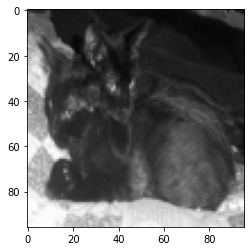

In [25]:
print(input_shape)
plt.imshow(x_train[0])

In [26]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       7

In [27]:
model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/15
188/188 [==============================] - 17s 74ms/step - loss: 0.9526 - accuracy: 0.5735 - val_loss: 0.8194 - val_accuracy: 0.5165
Epoch 2/15
188/188 [==============================] - 12s 65ms/step - loss: 0.7088 - accuracy: 0.6428 - val_loss: 0.7175 - val_accuracy: 0.5250
Epoch 3/15
188/188 [==============================] - 12s 65ms/step - loss: 0.5925 - accuracy: 0.7042 - val_loss: 0.6822 - val_accuracy: 0.6435
Epoch 4/15
188/188 [==============================] - 12s 65ms/step - loss: 0.5488 - accuracy: 0.7260 - val_loss: 0.9010 - val_accuracy: 0.5025
Epoch 5/15
188/188 [==============================] - 12s 65ms/step - loss: 0.5508 - accuracy: 0.7255 - val_loss: 0.8005 - val_accuracy: 0.6015
Epoch 6/15
188/188 [==============================] - 12s 65ms/step - loss: 0.4837 - accuracy: 0.7707 - val_loss: 1.3254 - val_accuracy: 0.4975
Epoch 7/15
188/188 [==============================] - 12s 65ms/step - loss: 0.4292 - accuracy: 0.8005 - val_loss: 0.9765 - val_accuracy:

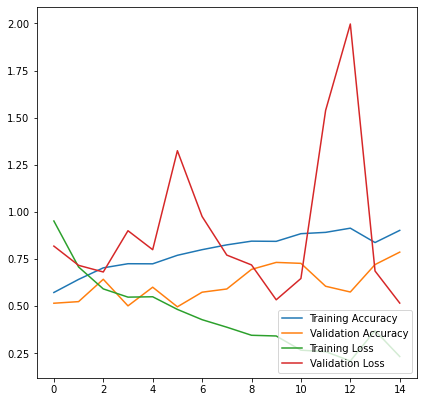

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('')
plt.show()